# 08 UMAP

In [ ]:
# Setup
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

### 3.3 UMAP (Uniform Manifold Approximation and Projection)

**UMAP** e una tecnica piu recente che combina i vantaggi di PCA e t-SNE. E piu veloce di t-SNE e preserva meglio la struttura globale.

#### Vantaggi di UMAP rispetto a t-SNE

| Caratteristica | t-SNE | UMAP |
|----------------|-------|------|
| Velocita | Lento | Veloce |
| Struttura globale | Scarsa | Buona |
| Scalabilita | Limitata | Buona |
| Riproducibilita | Bassa | Alta (con seed) |
| Uso come preprocessing | No | Si |

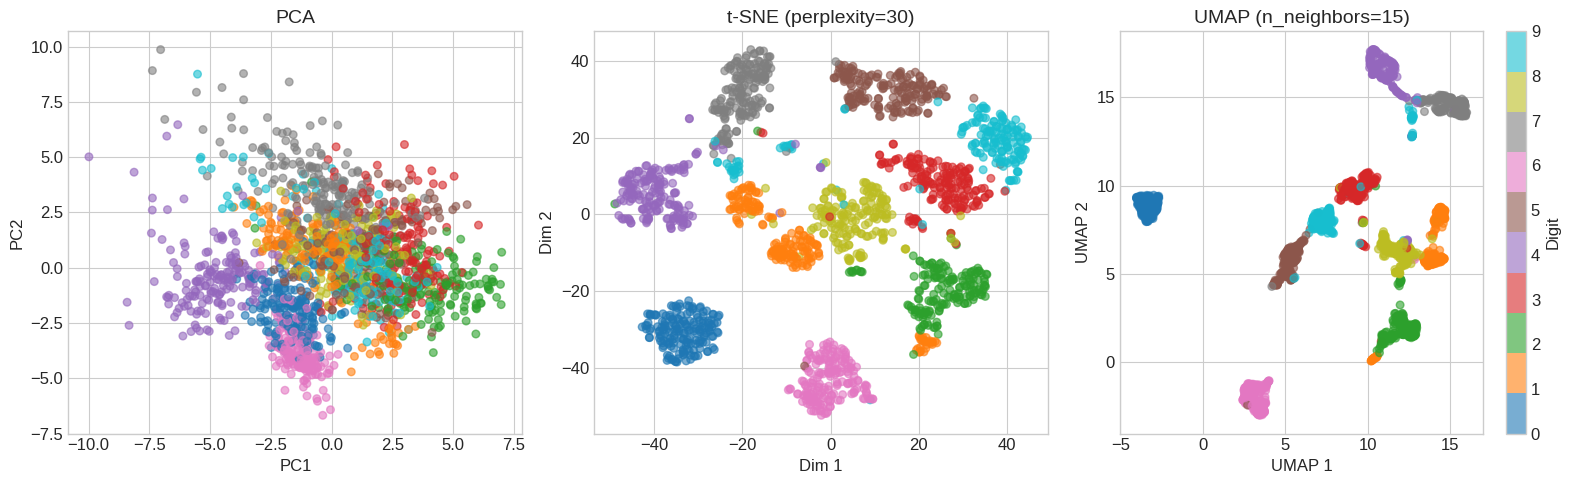

Nota: UMAP preserva meglio le relazioni tra cluster rispetto a t-SNE.


In [12]:
# SEZIONE 3.3: UMAP
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')

# Caricamento dati
digits_umap = load_digits()
X_umap = digits_umap.data
y_umap = digits_umap.target

# Standardizzazione
scaler_umap = StandardScaler()
X_umap_scaled = scaler_umap.fit_transform(X_umap)

# Confronto PCA vs t-SNE vs UMAP
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# PCA
pca_compare = PCA(n_components=2)
X_pca = pca_compare.fit_transform(X_umap_scaled)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[0].set_title('PCA', fontsize=14)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# t-SNE
tsne_compare = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_compare = tsne_compare.fit_transform(X_umap_scaled)
axes[1].scatter(X_tsne_compare[:, 0], X_tsne_compare[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[1].set_title('t-SNE (perplexity=30)', fontsize=14)
axes[1].set_xlabel('Dim 1')
axes[1].set_ylabel('Dim 2')

# UMAP
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,     # Simile a perplexity
    min_dist=0.1,       # Distanza minima tra punti nello spazio ridotto
    metric='euclidean',
    random_state=42
)
X_umap_2d = umap_model.fit_transform(X_umap_scaled)
scatter = axes[2].scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[2].set_title('UMAP (n_neighbors=15)', fontsize=14)
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')

plt.colorbar(scatter, ax=axes[-1], label='Digit')
plt.tight_layout()
plt.show()

print("Nota: UMAP preserva meglio le relazioni tra cluster rispetto a t-SNE.")

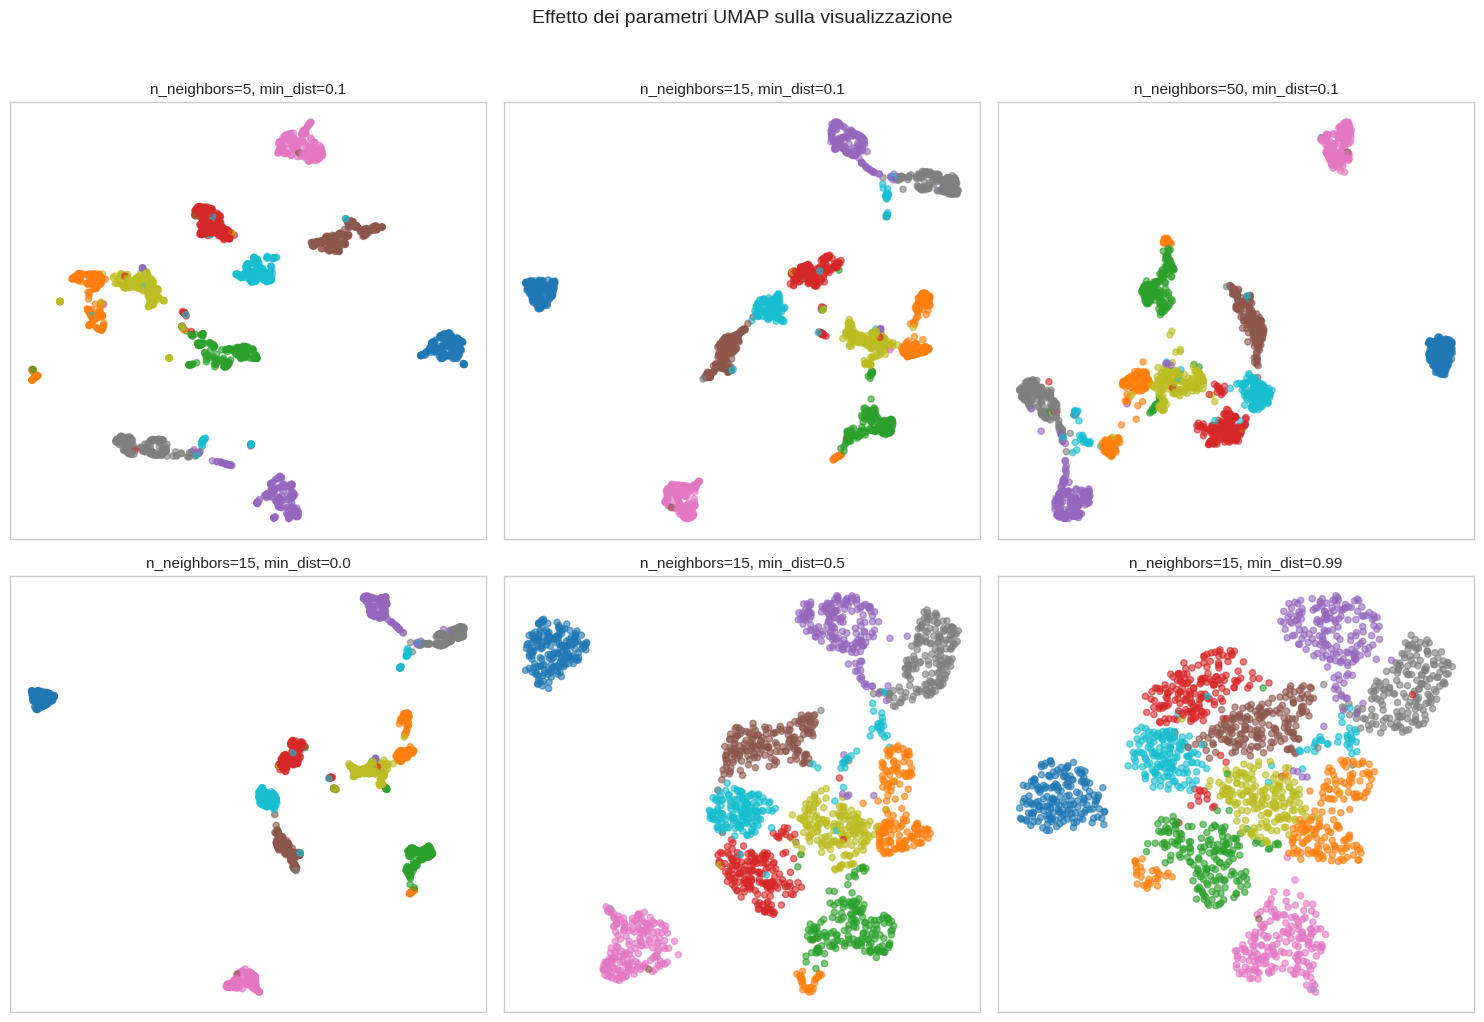

n_neighbors basso = struttura locale | alto = struttura globale
min_dist basso = cluster densi | alto = cluster sparsi


In [13]:
# Effetto dei parametri UMAP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')

# Ricaricamento dati
digits_params = load_digits()
X_params = digits_params.data
y_params = digits_params.target

scaler_params = StandardScaler()
X_params_scaled = scaler_params.fit_transform(X_params)

# Variazione parametri
params = [
    {'n_neighbors': 5, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 50, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.0},
    {'n_neighbors': 15, 'min_dist': 0.5},
    {'n_neighbors': 15, 'min_dist': 0.99},
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, param in zip(axes, params):
    reducer = umap.UMAP(n_components=2, random_state=42, **param)
    X_reduced = reducer.fit_transform(X_params_scaled)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_params, cmap='tab10', alpha=0.6, s=20)
    ax.set_title(f"n_neighbors={param['n_neighbors']}, min_dist={param['min_dist']}", fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Effetto dei parametri UMAP sulla visualizzazione', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("n_neighbors basso = struttura locale | alto = struttura globale")
print("min_dist basso = cluster densi | alto = cluster sparsi")

**Osservazioni importanti su UMAP**

- `n_neighbors` controlla il bilanciamento locale/globale (simile a perplexity)
- `min_dist` controlla quanto i punti possono avvicinarsi nella proiezione
- Puo essere usato come preprocessing per modelli ML
- Preserva meglio la topologia globale rispetto a t-SNE

**Quando usare UMAP**

- Dataset grandi (piu scalabile di t-SNE)
- Quando serve preservare struttura locale E globale
- Come preprocessing per clustering o classificazione
- Visualizzazione di embedding (NLP, immagini)